<a href="https://colab.research.google.com/github/pavanxk12/Option.strat/blob/main/UBacktest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
start = '2012-01-01'
end = '2022-12-21'
stock = 'HDFCBANK.NS'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
!pip install backtesting

In [ ]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from backtesting.test import SMA
class MySMAStrategy(Strategy):
  def init(self):
    price = self.data.Close
    self.ma1 = self.I(SMA, price, 5)
    self.ma2 = self.I(SMA, price, 8)
  def next(self):
    if crossover (self.ma1, self.ma2) :
      self.buy()
    break
    elif crossover (self.ma2, self.ma1):
      self.sell()
    break

backtest1=Backtest(data,MySMAStrategy,commission=.002,exclusive_orders=True)
stats=backtest1.run()

print(stats)

SyntaxError: invalid syntax (<ipython-input-58-167c252719ab>, line 13)

In [ ]:
backtest1.plot()

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:250: UserWarning:

DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:250: UserWarning:

DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_drag' property; using the latest value

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_scroll' property; using the latest value



GridPlot(id='p2819', ...)

In [ ]:
!pip install pandas-datareader
!pip install talib

ERROR: Could not find a version that satisfies the requirement talib (from versions: none)
ERROR: No matching distribution found for talib


In [ ]:
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py310hde88566_4.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.10/dist-packages/ lib/python3.10/site-packages/talib --strip-components=3
import talib

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4051    0  4051    0     0   8415      0 --:--:-- --:--:-- --:--:--  8422
100  517k  100  517k    0     0   619k      0 --:--:-- --:--:-- --:--:-- 4136k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4051    0  4051    0     0  12669      0 --:--:-- --:--:-- --:--:-- 12699
100  392k  100  392k    0     0   593k      0 --:--:-- --:--:-- --:--:--  593k


In [ ]:
import talib
import pandas_datareader as web

In [ ]:
import datetime as dt


In [ ]:
!pip install --upgrade pandas_datareader

In [ ]:
class MyMACDStrategy(Strategy):

    def init(self):
      price=self.data.Close
      self.macd=self.I(lambda x: talib.MACD(x)[0],price)
      self.macd_signal=self.I(lambda x:talib.MACD(x)[1],price)
    def next(self):
      if crossover(self.macd,self.macd_signal):
        self.buy()
      elif crossover(self.macd_signal,self.macd):
        self.sell()
start=dt.datetime(2020,1,1)
end=dt.datetime(2022,1,1)
# data=web.DataReader(["TSLA"],"yahoo",start,end)
backtest=Backtest(data,MyMACDStrategy,commission=.002,exclusive_orders=True,entries,exits,sl_)
print(backtest.run())ake
backtest.plot()

Start                     2012-01-02 00:00:00
End                       2022-12-20 00:00:00
Duration                   4005 days 00:00:00
Exposure Time [%]                    97.67098
Equity Final [$]                  3467.982502
Equity Peak [$]                  13872.707577
Return [%]                         -65.320175
Buy & Hold Return [%]              665.327399
Return (Ann.) [%]                   -9.394786
Volatility (Ann.) [%]               18.250258
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                  -77.492469
Avg. Drawdown [%]                   -9.028944
Max. Drawdown Duration     3410 days 00:00:00
Avg. Drawdown Duration      260 days 00:00:00
# Trades                                  220
Win Rate [%]                        30.909091
Best Trade [%]                      27.876201
Worst Trade [%]                    -13.905613
Avg. Trade [%]                    

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:250: UserWarning:

DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:250: UserWarning:

DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_drag' property; using the latest value

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_scroll' property; using the latest value



GridPlot(id='p1751', ...)

In [ ]:

class MyStrategy(Strategy):
    def init(self):
        price = self.data.Close
        self.bb = self.I(BBANDS, price, window=20, stddev=2)

    def next(self):
        # Check if all conditions are met
        if crossover(price,self.bb.lower_band):
            self.buy()
        elif (price,self.bb.upper_band):
            self.sell()

# Assuming 'data' is your historical price data

# Run the backtest
backtest = Backtest(data, MyStrategy, commission=0.002, exclusive_orders=True)
stats = backtest.run()

# Print statistics
print(stats)


NameError: name 'BBANDS' is not defined

In [ ]:
backtest.plot()

In [ ]:
import numpy as np

In [ ]:
!pip install vectorbt
import vectorbt as vbt
from vbt import MA, Portfolio

ModuleNotFoundError: No module named 'vbt'

In [ ]:
from vectorbt import MA,Portfolio

In [ ]:
import numpy as np
import vectorbt as vbt

# Set the start and end dates
start_date = '2020-01-01'
end_date = '2024-01-01'

# Download historical price data for HDFC Bank (NSE: HDFCBANK.NS)
price = vbt.YFData.download('HDFCBANK.NS', start=start_date, end=end_date, missing_index='drop').get('Close')


In [ ]:
# price=vbt.YFData.download('HDFCBANK.NS',missing_index='drop').get('Close')
windows = np.arange (2, 101)
fast_ma, slow_ma = vbt.MA.run_combs(price, window=windows, r=2, short_names=['fast', 'slow'])
entries = fast_ma.ma_above(slow_ma)
exits = fast_ma.ma_below(slow_ma)
pf_kwargs = dict(size=np.inf, fees=0.001, freq='1D')
pf = vbt.Portfolio.from_signals(price, entries, exits, **pf_kwargs)
fig = pf. total_return().vbt.heatmap(
x_level='fast_window', y_level='slow_window', symmetric=True, trace_kwargs=dict(colorbar=dict(title='Total return', tickformat='%')))
fig. show()

In [ ]:
vbt.BBANDS.run(price).plot().show()

In [ ]:
class MyStrategy(Strategy):
    def init(self):
        price = self.data.Close
        self.rolling_mean=self.I(SMA,price,10)
        self.rolling_std=self.StdDev(price,10)
        self.upper_band = rolling_mean + (2 * rolling_std)
        self.lower_band = rolling_mean - (2 * rolling_std)

    def next(self):
        # Check if price crosses above the upper Bollinger Band for buying
        if crossover(self.data.Close, self.upper_band):
            self.buy()
        # Check if price crosses below the lower Bollinger Band for selling
        elif crossover(self.data.Close, self.lower_band):
            self.sell()


# Assuming 'data' is your historical price data

# Run the backtest
backtest = Backtest(data, MyStrategy, commission=0.002, exclusive_orders=True)
stats = backtest.run()

# Print statistics
print(stats)


AttributeError: 'MyStrategy' object has no attribute 'StdDev'

In [ ]:
backtest.plot()

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:250: UserWarning:

DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:250: UserWarning:

DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_drag' property; using the latest value

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_scroll' property; using the latest value



GridPlot(id='p2107', ...)

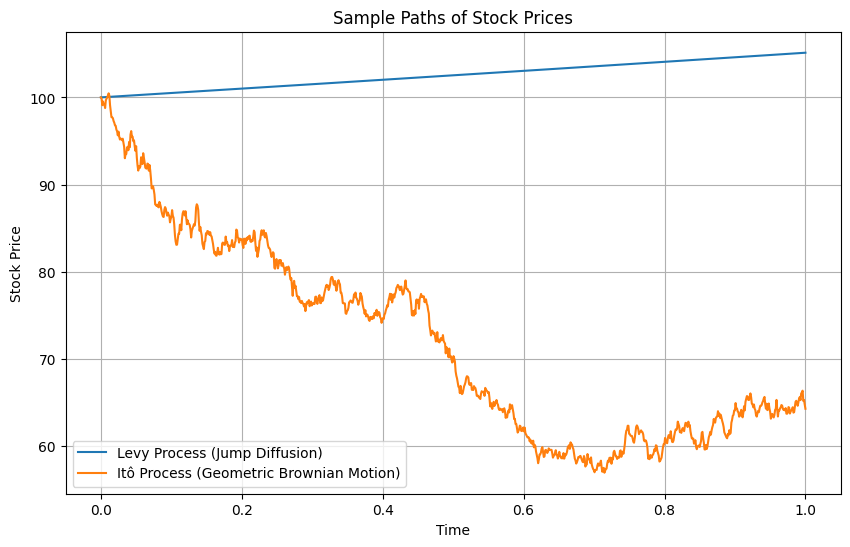

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 1                   # Time horizon
N = 1000                # Number of time steps
dt = T / N              # Time step size
mu = 0.05               # Drift rate
sigma = 0.2             # Volatility
S0 = 100                # Initial stock price

# Generate Wiener process increments
dW = np.sqrt(dt) * np.random.randn(N)

# Generate Levy jump increments
lam = 0.1               # Jump intensity
dJ = np.random.poisson(lam * dt, N)
J = np.random.normal(0, sigma, size=N)
J = np.where(dJ > 0, J, 0)

# Simulate Levy process (Levy Jump Diffusion Model)
S_levy = np.zeros(N)
S_levy[0] = S0
for i in range(1, N):
    S_levy[i] = S_levy[i-1] + mu * S_levy[i-1] * dt + J[i]

# Simulate Itô process (Geometric Brownian Motion)
S_ito = np.zeros(N)
S_ito[0] = S0
for i in range(1, N):
    S_ito[i] = S_ito[i-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * dW[i])

# Plot sample paths
t = np.linspace(0, T, N)
plt.figure(figsize=(10, 6))
plt.plot(t, S_levy, label='Levy Process (Jump Diffusion)')
plt.plot(t, S_ito, label='Itô Process (Geometric Brownian Motion)')
plt.title('Sample Paths of Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()


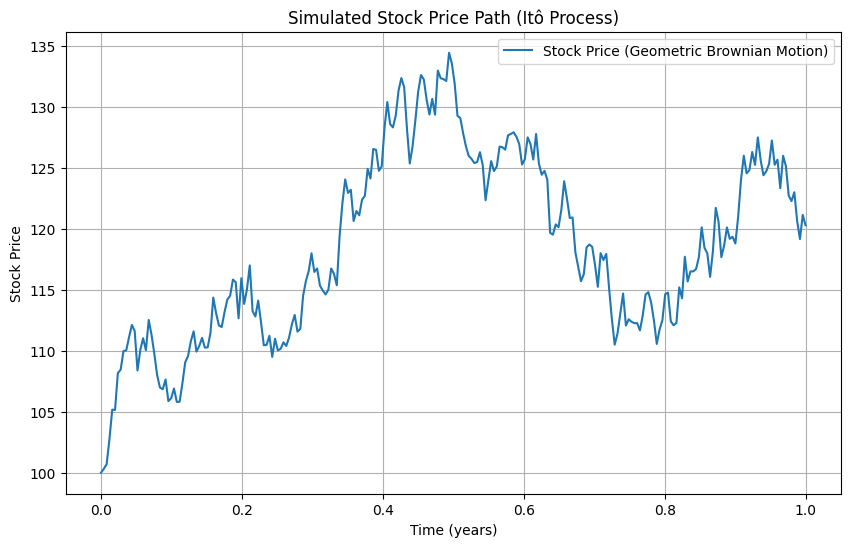

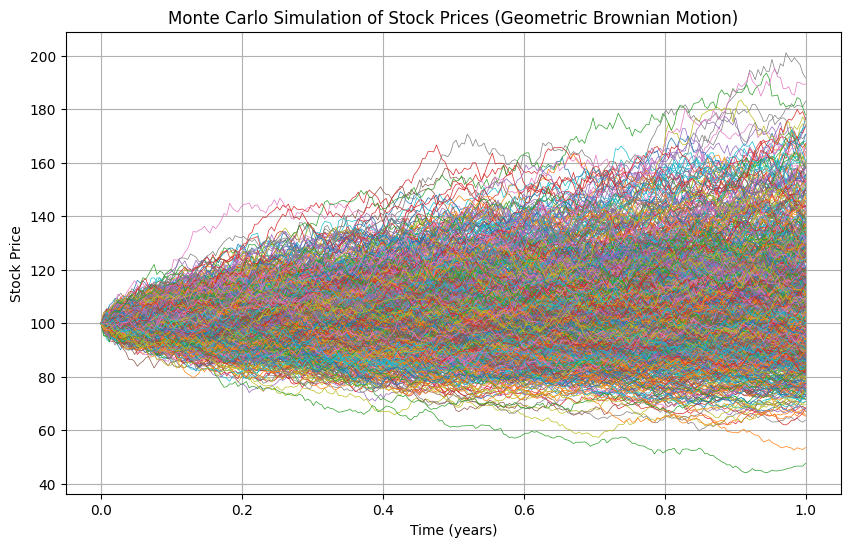

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 1                   # Time horizon (years)
N = 252                 # Number of time steps
dt = T / N              # Time step size
mu = 0.08               # Drift (expected return)
sigma = 0.2             # Volatility
S0 = 100                # Initial stock price

# Generate Wiener process increments (Brownian motion)
dW = np.sqrt(dt) * np.random.randn(N)

# Simulate stock price path using geometric Brownian motion (Itô process)
S_ito = np.zeros(N)
S_ito[0] = S0
for i in range(1, N):
    S_ito[i] = S_ito[i-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * dW[i])

# Plot the simulated stock price path
t = np.linspace(0, T, N)
plt.figure(figsize=(10, 6))
plt.plot(t, S_ito, label='Stock Price (Geometric Brownian Motion)')
plt.title('Simulated Stock Price Path (Itô Process)')
plt.xlabel('Time (years)')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 1                   # Time horizon (years)
N = 1000                # Number of simulations
M = 252                 # Number of time steps (trading days)
dt = T / M              # Time step size
mu = 0.08               # Drift (expected return)
sigma = 0.2             # Volatility
S0 = 100                # Initial stock price

# Generate random numbers for Monte Carlo simulation
dW = np.sqrt(dt) * np.random.randn(M, N)

# Simulate stock price paths using geometric Brownian motion
S_mc = np.zeros((M+1, N))
S_mc[0] = S0
for i in range(1, M+1):
    S_mc[i] = S_mc[i-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * dW[i-1])

# Plot the simulated stock price paths
t = np.linspace(0, T, M+1)
plt.figure(figsize=(10, 6))
for i in range(N):
    plt.plot(t, S_mc[:, i], linewidth=0.5)
plt.title('Monte Carlo Simulation of Stock Prices (Geometric Brownian Motion)')
plt.xlabel('Time (years)')
plt.ylabel('Stock Price')
plt.grid(True)
plt.show()
